# Quantum Machine Learning for detecting financial crashes

### Learning objectives of the challenge -- a change

**1.** How to use classical topological data analysis, TDA, for financial bubble early warning? <br>
**2.** How to implement its quantum counterpart? <br>
**3.** Conduct a resource analysis on the quantum algorithm. Which step is most costly? <br>
**4.** Get used to Quantum Phase Estimation, QPE. <br>
**5.** How is the influence of the classical noise (the random fluctuations in financial markets)? <br>
**6.** How is the influence of quantum noise? <br>

## The challenge

### Main idea

Topological Data Analysis (TDA) is a robust and innovative technique that has demonstrated impressive results in detecting financial crashes—critical transitions between financial regimes—and providing early warning signals. By analyzing changes in Betti numbers, TDA can reveal shifts in underlying structures that precede these transitions. In this notebook, we employ a quantum TDA algorithm to calculate Betti numbers, enabling effective early detection of financial crashes.

### What is topological data analysis

Topology studies the properties of geometric objects that are preserved under continuous deformations, such as stretching, twisting, crumpling, and bending. Homology serves as a tool to study and quantify the topological properties of spaces. The homology of an object is often summarized using $k$-th Betti numbers, which count the number of $k$-dimensional holes within the object. For example, the zeroth Betti number, $\beta_0$, counts the number of connected components; the first Betti number, $\beta_1$, counts the number of loops; and the second Betti number, $\beta_2$, counts the number of enclosed volumes, and so on.

In finance, input data is typically represented as time series, which are subsequently transformed into a series of discrete points. To model the underlying structure with them, we construct a simplicial complex (specifically, a Vietoris–Rips complex), a collection of simple shapes that connect the points together. Those simple shapes are called simplex, and they are generalization of the notion of a triangle or tetrahedron to arbitrary dimensions. A $k$-simplex is a collection of $k + 1$ vertices with $k(k + 1)/2$ edges in $k$ dimensions. A resolution threshold, $\epsilon$, is chosen so that any two points within $\epsilon$ distance of each other are connected by a line segment in the simplicial complex. As $\epsilon$ increases, more connections are added, and lower-order components may merge into higher-order components. This results in a decrease in the lower-order Betti numbers and an increase in the higher-order Betti numbers. The study of how topological properties change across a sequence of resolution thresholds is called persistent homology.

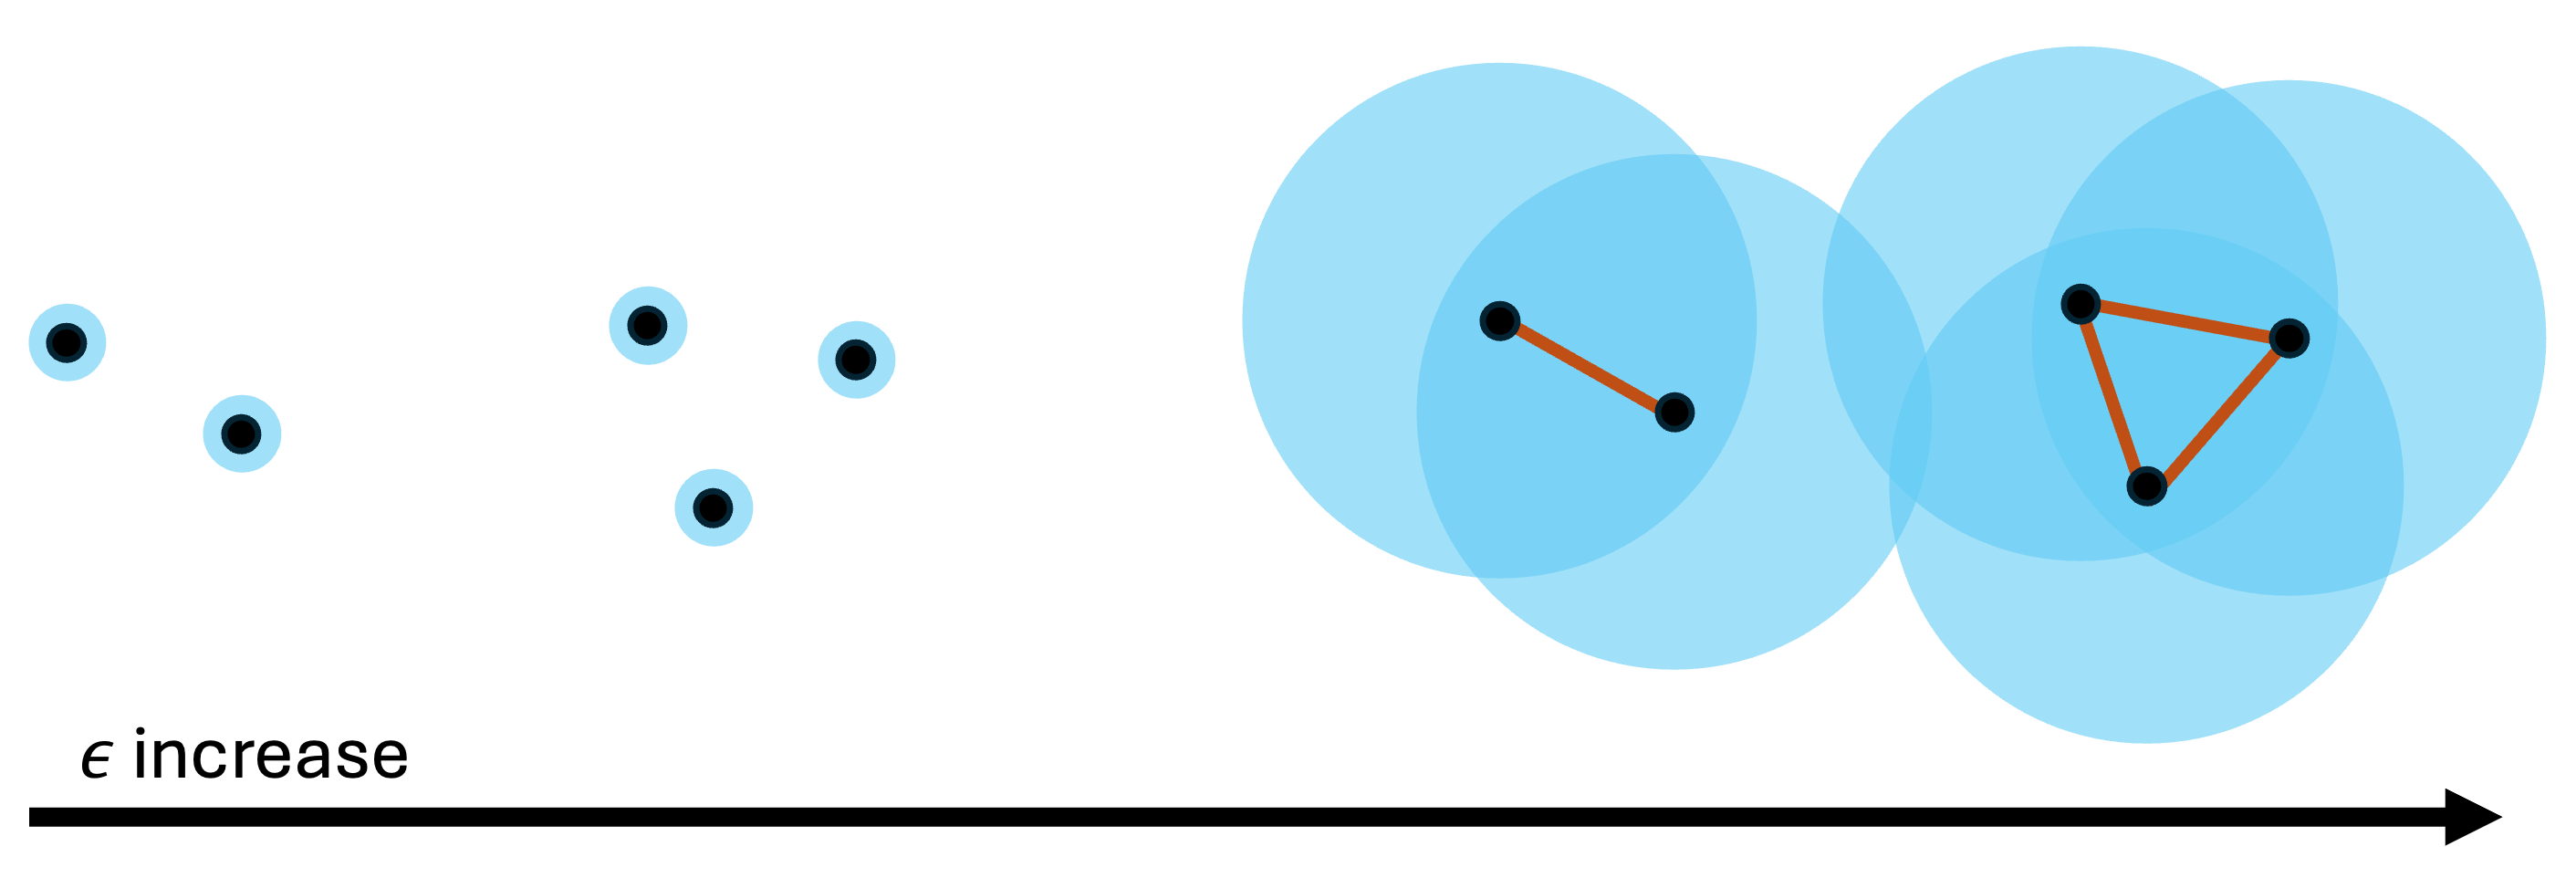

For example, consider the figure above, which consists of five points. When $\epsilon$ is small, no lines connect the points. Consequently, $\beta_0 = 5$, as there are five discrete points, each representing an independent connected component, and no higher-dimensional features are present. As $\epsilon$ increases, the Betti numbers for the configuration on the right become:

* $\beta_0=2$: There are two connected components (a line segment and a triangle).
* $\beta_1=1$: There is one 1-dimensional hole (the triangle encloses a region).
* $\beta_k=0$ for $k\ge2$: No higher-dimensional features exist.

This example also illustrates how Betti numbers change with the resolution threshold. The sequence of Betti numbers as the resolution threshold varies forms a curve known as the Betti curve. This curve can be utilized as input for kernel construction in machine learning applications.

### What is quantum TDA?

TDA can be used for extracting complex and valuable shape-related summaries of high-dimensional data. However, as the size of the dataset grows, the number of simplices considered increases significantly, leading to an exponential rise in the computational complexity of TDA algorithms ([ref](https://quantum-journal.org/papers/q-2022-11-10-855/)). 

Quantum computers have the potential to significantly accelerate TDA algorithms. Lloyd et al. introduced a fully quantum TDA algorithm leveraging quantum random access memory (qRAM), Grover's search algorithm, and quantum phase estimation (QPE) ([ref](https://www.nature.com/articles/ncomms10138)). In this approach, classical data is first loaded and encoded into the quantum amplitudes of a quantum state via qRAM. Grover's algorithm is then employed to construct the simplex state, with a membership function used to determine whether a given simplex belongs to the complex. Finally, the combinatorial Laplacian (also referred to as the "Dirac operator") is constructed, and the Betti numbers—key topological invariants—are extracted using QPE. 

However, this quantum TDA algorithm is really costly for NISQ computers. Even more, the qRAM requires long-lasting quantum coherence and low computational error to store and process the loaded data. Several exciting alternatives approaches have been proposed since then. It must be noted that quantum TDA is one of the first quantum machine learning algorithms with short depth and potential significant speedup under certain assumptions.

Here is a list of different versions of quantum TDA. Note that they may be beyond the scope of this challenge, and mainly for your interest:

* [QTDA via the estimation of the density of states (December 2023, University of Exeter)](https://arxiv.org/abs/2312.07115)
* [NISQ-TDA  (Sep 2022, IBM Research + University of the Witwatersrand)](https://arxiv.org/pdf/2209.09371)
* [Quantum persistent homology (Nov 2022, University of Tennessee)](https://arxiv.org/abs/2211.04465)
* [Hybrid qTDA (Oct 2022, Deloitte)](https://arxiv.org/abs/2209.10596)
* [Quantum-Enhanced TDA (Feb 2023, Tata Consultancy Services)](https://arxiv.org/pdf/2302.09553)

### Does TDA have applications in finance?

Betti numbers offer valuable insights into the structure and shape of complex data. While their use in finance is still in its early stages, they show promise in various applications, such as credit risk prediction ([ref](https://ora.ox.ac.uk/objects/uuid:9f4bed48-1763-486f-acbe-393670fab6bb/files/skw52j939s)), fraud detection, financial bubble detection ([ref](https://arxiv.org/abs/2304.06877)), capturing financial instability ([ref](https://arxiv.org/pdf/2110.00098)), etc. It can also be used as an unsupervised learning algorithm for anomaly detection.

Several studies suggest that Betti numbers serve as effective indicators of market crashes. The zeroth betti number $\beta_0$ is small at the beginning of a market crash and increases as the market crash progresses. It can be interpreted as that there is a giant connected component in the market just before the crash, and as the market crashed, this broke up into many smaller components ([ref](https://www.mdpi.com/1099-4300/23/9/1211), [ref](https://www.frontiersin.org/journals/physics/articles/10.3389/fphy.2021.572216/full)). 

This concept serves as the foundation for the idea behind this challenge.

## Problem Statement - Detecting financial bubbles by using quantum topological data analysis (qTDA)

The goal of this challenge is to build a quantum TDA pipeline for detecting financial market crashes. The process is outlined in the following key steps, with detailed instructions provided below. Follow the **Instructions** and **Action** parts carefully and implement the necessary code after **Answer** to complete the pipeline.

These references deal with the problem at hand and can be helpful to consult:
* [Quantum-Enhanced Topological Data Analysis: A  Peep from an Implementation Perspective](https://arxiv.org/pdf/2302.09553)
* [Towards Quantum Advantage via Topological Data  Analysis](https://quantum-journal.org/papers/q-2022-11-10-855/)

<div class="alert alert-block alert-success"> 
    
**STEPS**
    
* Input: a time series of stock price; Output: a time-evolution of topological properties.

* Preparing point cloud
    * Apply Taken's embedding.
    * Apply a sliding window for obatining a time-varying point-cloud.
* Building Laplacian
    * Construct the Vietoris-Rips (VR) complex from the point cloud using [`GUDHI`](https://gudhi.inria.fr/).
    * Build the boundary operator of this complex.
    * Build the Laplacian matrix based on the boundary operators, then pad it and rescale it.
* Applying quantum phase estimation
    * Use Quantum Phase Estimation (QPE) to find the number non-zero eigenvalues of the Laplacian matrix. Round up the results and get the Betti numbers.
    * Vary the resolution threshold and obtain a series of Betti numbers, which are the Betti curves.
* Detecting financial market crashes
    * Find the relation between Betti numbers and financial market crashes.
    
 </div>

<div class="alert alert-block alert-info"> <b>NOTE</b>:

In the coding process, it is recommended to start with the following initial values for the variables: 

* `N = 4` # dimension of vectors
* `d = 5`  # time delay
* `w = 5`  # window size
* `epsilon = 0.1` # resolution threshold
* `q = 3` # number of precision qubits

However, you will be tasked with determining the optimal values later in this challenge.

</div>

### Step 0: Loading data


To assess the practical applicability of TDA with quantum techniques, we will analyze a small dataset of the S&P 500 index from the period surrounding the 2008 financial crisis. You may find the associated file: *SP500.csv*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# time_series = np.log(pd.read_csv("sp500.csv", header=None).to_numpy().squeeze())

### Step 1: Preparing point cloud

**Instruction:**

Consider a time series $X = \{x_0, x_1, \ldots, x_{L-1}\}$ of numerical values of length $L$ as input. We choose and fix an embedded dimension $N$ and a time-delay $d \ge 1$. Taken's embedding theorem convert this time series into a series of $N$-dimensional time-delay coordinate vectors $Z=\{z_0, z_1, \dots, z_{L-1-(N-1)d}\}$:

$$
\begin{align*}
z_0 =& (x_0, x_d, \ldots, x_{(N-1)d}),\\
z_1 =& (x_1, x_{1+d}, \ldots, x_{1+(N-1)d}),\\
\vdots\\
z_t =& (x_t, x_{t+d}, \ldots, x_{t+(N-1)d}),\\
\vdots&\\
z_{L-1-(N-1)d} =& (x_{L-1-(N-1)d}, x_{L-1-(N-2)d}, \ldots, x_{L-1}).
\end{align*}
$$

To detect qualitative changes along a time series, we apply a sliding window of size $w$ and assess how topological properties change along the sliding window. For a proper size, $w$ needs to fullfill $N \ll w \ll L$. The sliding window gives a time-varying point cloud embedded in $\mathcal{R}^N$:

$$
Z^t = \{z_t, z_{t+1}, \ldots, z_{t+w-1}\}, \quad \text{for } t \in \{0, \ldots, K-1\}
$$

**Action:**

Following Takens' embedding theorem, transform the `time_series` into a series of $ N $-dimensional vectors. Afterward, apply a sliding window to these vectors and obtain a time-varying point cloud.

**Answer:**

In [2]:
import numpy as np

def takens_embedding(time_series, embedding_dim, time_delay):
    """
    Perform Takens' embedding of a univariate time series.
        
    Returns
    -------
    embedded_vectors : numpy.ndarray
        A 2D array of shape (M, N), where M = L - (N - 1)*delay,
        containing the embedded vectors.
    """
    
    time_series = np.asarray(time_series)
    L = len(time_series)
    N = embedding_dim
    d = time_delay
    
    # Number of embedded vectors
    M = L - (N - 1)*d
    if M <= 0:
        raise ValueError("Time series is too short for the chosen embedding_dim and delay.")
    
    # Creating the embedded vectors
    embedded_vectors = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            embedded_vectors[i, j] = time_series[i + j*d]
            
    return embedded_vectors


def sliding_window_point_clouds(embedded_vectors, window_size):
    """
    Apply a sliding window to the sequence of embedded vectors to obtain
    time-varying point clouds.
        
    Returns
    -------
    point_clouds : list of numpy.ndarray
        A list of length K, where K = M - w + 1.
        Each element is a 2D array of shape (w, N), containing the points
        in the current window.
    """
    M, N = embedded_vectors.shape
    w = window_size
    
    if w > M:
        raise ValueError("Window size w cannot exceed the number of embedded vectors M.")
    
    # Number of windows
    K = M - w + 1
    point_clouds = []
    for t in range(K):
        # Extract the window of embedded vectors
        window_vectors = embedded_vectors[t:t+w, :]
        point_clouds.append(window_vectors)
        
    return point_clouds

def series_to_point_clouds(time_series, embedding_dim, time_delay, window_size):
    """
    Convert a univariate time series into a collection of time-varying point clouds.
        
    Returns
    -------
    point_clouds : list of numpy.ndarray
        A list of point clouds, each represented as a 2D array of shape (w, N).
    """
    embedded_vectors = takens_embedding(time_series, embedding_dim, time_delay)
    point_clouds = sliding_window_point_clouds(embedded_vectors, window_size)
    return point_clouds


<div class="alert alert-block alert-danger">
    
<b>BONUS EXERCISE:</b> 

`gtda.time_series.TakensEmbedding` can conduct this transformation. Try avoid using this function and build your own embedding function.

</div>

<div class="alert alert-block alert-info"> <b>NOTE</b>:

From step 2, we present an example originally provided in the appendix of [Khandelwal's and Chandra's paper](https://arxiv.org/abs/2302.09553). This example can be used to verify your code.

</div>

### Step 2: Building Laplacian

**Instruction:**

In this step, we are going to use `GUDHI`, a Python package specialized in TDA and and higher dimensional geometry understanding. For detailed instructions on the functions we will use, please refer to [this website](https://gudhi.inria.fr/python/latest/rips_complex_user.html#).

A simplicial complex is constructed on the point cloud using `gudhi.RipsComplex` class, followed by its `create_simplex_tree` method. The resolution threshold `epsilon` is set via the `max_edge_length` parameter. This process identifies the connectivity of the complex within the resolution threshold and produces a simplex tree. The simplex tree serves as a general representation of simplicial complexes. Using its `get_filtration` method, simplicies are retrieved as a collection of lists, where elements are grouped based on their connections. Each dimension up to a specified maximum is represented by its respective collection of lists.

**Example:**

Here is an example of a simplex tree $\mathcal{K}$ with a maximum dimension of 2. In its zeroth dimension, each point is a connected component; In the first dimension, 6 line segments connect 6 pairs of points $[1, 2], [1, 3], [2, 3], [3, 4], [3, 5], [4, 5]$; In the second dimension, a filled trangle is formed among points $[1 ,2 ,3]$.

$$
\mathcal{K} = [[[1], [2], [3], [4], [5]],[[1, 2], [1, 3], [2, 3], [3, 4], [3, 5], [4, 5]], [[1, 2, 3]]]
$$

**Action:**

Build a simplicial complex by applying functions from `GUDHI` on the point cloud obtained in step 1, and extract its simplex tree. It is recommended to store the simplex tree in a format similar to the example provided, i.e., in the format $[S_0, S_1, S_2, \dots]$, where $S_i$ represents the set of $i$-simplices.

**Answer:**

In [3]:
import gudhi

def build_simplicial_complex(point_cloud, max_dimension, max_edge_length):
    """
    Build a Rips simplicial complex from a given point cloud using GUDHI
    and extract its simplex tree in dimension-wise format:
        [ S_0, S_1, ..., S_max_dimension ],
    where S_i is the collection of all i-simplices.
        
    Returns
    -------
    simplex_tree_dimwise : list of lists
        A list of length (max_dimension + 1),
        where each element is a list of simplices of the corresponding dimension.
        For instance,
            simplex_tree_dimwise[0] = all 0-simplices (individual vertices),
            simplex_tree_dimwise[1] = all 1-simplices (edges),
            ...
            simplex_tree_dimwise[max_dimension] = all max_dimension-simplices.
    """
    rips_complex = gudhi.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    
    #    We're preparing a container for simplices dimension-wise.
    #    We allocate one list for each dimension from 0 up to max_dimension.
    simplex_tree_dimwise = [[] for _ in range(max_dimension + 1)]
    
    #    We extract the filtration of the simplex tree, returning a list of tuples of the form (simplex, filtration_value).
    for simplex, filtration_value in simplex_tree.get_filtration():
        # The dimension of the simplex is given by the number of vertices - 1
        dim = len(simplex) - 1
        if dim <= max_dimension:

            sorted_simplex = sorted(simplex)

            simplex_tree_dimwise[dim].append(sorted_simplex)
            
    return simplex_tree_dimwise


**Instruction:**

Let $S_k$ be the set of $k$-simplicies in the complex $\mathcal{K}$ with individual simplicies denoted by $s_k ∈ S_k$ written as $[j_0, j_1, \dots, j_k]$ where $j_i$ is the $i$-th vertex of $s_k$. Note that the vertices are ordered in ascending fashion in the initial point cloud, and this order is kept throughout. The restricted boundary operator $\partial_k$ is defined on the $k$-simplicies as:

$$
\begin{align*}
\partial_k s_k &= \sum_{t=0}^{k} (-1)^t [v_0, \dots, v_{t-1}, v_{t+1}, \dots, v_k]\\
&= \sum_{t=0}^{k} (-1)^t s_{k-1} (t)
\end{align*}
$$

where $s_{k−1}(t)$ is defined as the lower simplex defined from $s_k$ by leaving out the vertex $v_t$. 

**Example:**

In the simplex tree $\mathcal{K}$ we have 1 2-simplex and 6 1-simplicies. By leaving out vertice $v_0=1$, $v_1=2$, $v_2=3$, we obtain the lower simplex $s_1=[2, 3]$, $s_2=[1, 3]$, $s_3=[1, 2]$, respectively. Therefore, the boundary operator on the 2-simplicies $\partial_2$ should be a 6-by-1 matrix:

$$
\partial_2 =
\begin{bmatrix}
1 \\
-1 \\
1 \\
0 \\
0 \\
0
\end{bmatrix}
$$

In the same way, the boundary operator on the 1-simplicies $\partial_1$ is:

$$
\partial_1 =
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & 0 & 0 \\
0 & -1 & -1 & 1 & 1 & 0 \\
0 & 0 & 0 & -1 & 0 & 1 \\
0 & 0 & 0 & 0 & -1 & -1
\end{bmatrix}
$$

**Action:**

Define a function that generates the boundary operator for a specified dimension, using a given simplex tree as input.

**Answer:**

In [4]:
def boundary_operator(simplex_tree_dimwise, k):
    """
    Construct the boundary operator ∂_k (as a matrix).
    ...
    """
    # Special handling if k=0 => we want shape (0, #S_0), not (0,0)
    if k == 0:
        S_0 = simplex_tree_dimwise[0]
        num_0_simplices = len(S_0)  # #S_0
        # Return shape (0, #S_0). Multiplying out will yield a ( #S_0 x #S_0 ) zero matrix.
        return np.zeros((0, num_0_simplices), dtype=int)
    
    # If k >= len(simplex_tree_dimwise), also return an empty array but shape matters less
    if k >= len(simplex_tree_dimwise):
        return np.array([[]], dtype=int)

    S_k = simplex_tree_dimwise[k]      
    S_km1 = simplex_tree_dimwise[k-1] 

    # Build dictionary for quick lookups
    S_km1_dict = {tuple(s): i for i, s in enumerate(S_km1)}

    num_k_simplices = len(S_k)
    num_km1_simplices = len(S_km1)

    boundary_mat = np.zeros((num_km1_simplices, num_k_simplices), dtype=int)

    # Fill boundary matrix
    for col_idx, simplex in enumerate(S_k):
        for t in range(k+1):
            lower_simplex = list(simplex[:t] + simplex[t+1:])
            sign = (-1)**t
            row_idx = S_km1_dict.get(tuple(lower_simplex), None)
            if row_idx is not None:
                boundary_mat[row_idx, col_idx] = sign

    return boundary_mat



**Instruction:**

The combinatorial laplacian $\Delta_k$ is defined as:

$$
\Delta_k = \left( \partial_k \right)^\dagger \partial_k 
+ \partial_{k+1} \left( \partial_{k+1} \right)^\dagger
$$

The QPE algorithm will be used to estimate the number of zero eigenvalues of the Laplacian matrix. Since its exponential matrix serves as the unitary matrix in this algorithm, it must have dimensions $2^q \times 2^q$, where $q$ represents the number of target qubits. It is recommanded to pad the combinatorial laplacian $\Delta_k$ with an identity matrix with $\tilde{\lambda}_{max}/2$ in place of ones, where $\tilde{\lambda}_{max}$ is the estimate of the maximum eigenvalue of $\Delta_k$ using the Gershgorin circle theorem ([details](https://mathworld.wolfram.com/GershgorinCircleTheorem.html)), such that:

$$
\tilde{\Delta}_k =
\begin{bmatrix}
\Delta_k & 0 \\
0 & \frac{\widetilde{\lambda}_{\text{max}}}{2} \cdot I_{2q - |S_k|}
\end{bmatrix}_{2q \times 2q}
$$

where $\Delta_k$ is the padded combinatorial laplacian and $q = \lceil \log_2 |S_k| \rceil$ is the number of qubits this operator will act on. In QPE, as $2\pi\theta$ increases beyond $2\pi$, the eigenvalues will start repeating due to their periodic form. Thus, $\theta$ is restricted to $[0, 1)$. As $\lambda \to 2\pi\theta$ this means that $λ \in [0, 2\pi)$. Thus, we need to restrict the eigenvalues of the combinatorial laplacian to this range. This can be achieved by rescaling $\tilde{\Delta}_k$ by $\delta/\tilde{\lambda}_{max}$ where $\delta$ is slightly less than $2\pi$. Thus, the rescaled matrix $H$ and the unitary marix $U$ for QPE are:

$$
\begin{align*}
H &= \frac{\delta}{\tilde{\lambda}_k} \tilde{\Delta}_k\\
U &= e^{iH}
\end{align*}
$$

**Example:**

In our example, the combinational laplacian is in the form of a $6\times6$ matrix:

$$
\begin{align*}
\Delta_1 &= (\partial_1)^\dagger \partial_1 + \partial_2 (\partial_2)^\dagger\\
&=
\begin{bmatrix}
3 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & -1 & -1 & 0 \\
0 & 0 & 3 & -1 & -1 & 0 \\
0 & -1 & -1 & 2 & 1 & -1 \\
0 & -1 & -1 & 1 & 2 & 1 \\
0 & 0 & 0 & -1 & 1 & 2
\end{bmatrix}
\end{align*}
$$

It is padded with $\tilde{\lambda}_{max}=6$ and $\delta=6$ to its nearest power of 2, which is 8 ($q=3$):

$$
\begin{align}
H_1 = \begin{bmatrix}
3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & -1 & -1 & 0 & 0 & 0 \\
0 & 0 & 3 & -1 & -1 & 0 & 0 & 0 \\
0 & -1 & -1 & 2 & 1 & -1 & 0 & 0 \\
0 & -1 & -1 & 1 & 2 & 1 & 0 & 0 \\
0 & 0 & 0 & -1 & 1 & 2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 3
\end{bmatrix}
\end{align}
$$

**Action:**

Define a function to build the Laplacian, where Define a function that automatically determines whether the input Laplacian matrix requires padding. If padding is needed, the function will pad and rescale the matrix accordingly. Then, build the unitary based on the padded matrix, in the form of a circuit.

**Answer:**

In [5]:
import numpy as np
from math import ceil, log2, pi
from scipy.linalg import expm

from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

def gershgorin_bound(A):
    """
    Estimate the maximum eigenvalue of a square matrix A (in absolute value)
    using the Gershgorin circle theorem.
    """
    diag_abs = np.abs(np.diag(A))
    off_diag_sum = np.sum(np.abs(A), axis=1) - diag_abs
    
    # The Gershgorin upper bound is given by: max over i of (|A_{ii}| + sum_{j != i} |A_{ij}|)
    return np.max(diag_abs + off_diag_sum)


def compute_unpadded_laplacian(point_cloud, k, max_edge_length, max_dimension=2):
    """
    Build the unpadded k-th combinatorial Laplacian directly from
    a point cloud. Internally, this function:

      1) Builds a Rips simplicial complex from the point cloud using `GUDHI`,
         up to dimension (k+1) by default (unless overridden by `max_dimension`).
      2) Extracts the boundary operators ∂_k and ∂_(k+1).
      3) Forms the Laplacian: 
             ∆_k = (∂_k)^T ∂_k  +  ∂_(k+1) (∂_(k+1))^T.
    
    Parameters
    ----------
    point_cloud : array_like, shape (n_points, embedding_dim)
        The point cloud (e.g., from Takens embedding or any set of points in R^d).
    k : int
        The homological dimension for which we want ∆_k.
    max_edge_length : float
        'Resolution threshold' for building the Rips complex. Edges longer
        than this are not included in the complex.
    max_dimension : int or None, optional
        The maximum dimension up to which the Rips complex should build simplices.
        Defaults to k+1 if None. If you want to build higher-dimensional simplices
        (e.g., to later compute Laplacians for multiple k), you can set this larger.
    
    Returns
    -------
    Delta_k : np.ndarray
        The unpadded k-th combinatorial Laplacian, shape (#S_k, #S_k).
    """
    if max_dimension is None:
        max_dimension = k + 1

    # We build the simplicial complex up to `max_dimension`
    simplex_tree_dimwise = build_simplicial_complex(
        point_cloud=point_cloud,
        max_dimension=max_dimension,
        max_edge_length=max_edge_length
    )

    # Next we extract boundary operators ∂_k and ∂_(k+1)
    partial_k = boundary_operator(simplex_tree_dimwise, k)
    partial_k_plus_1 = boundary_operator(simplex_tree_dimwise, k+1)

    # The Laplacian is given by: ∆_k = (∂_k)^T ∂_k + ∂_(k+1) (∂_(k+1))^T
    term_1 = partial_k.T @ partial_k
    term_2 = partial_k_plus_1 @ partial_k_plus_1.T

    Delta_k = term_1 + term_2

    # we ensure Delta_k is of type numpy ndarray to avoid tuples
    if not isinstance(Delta_k, np.ndarray):
        Delta_k = np.array(Delta_k)

    return Delta_k


def build_padded_laplacian(Delta_k: np.ndarray, delta: float = None):
    """
    Construct the padded and rescaled Laplacian matrix H for QPE, along with its dimension q.
    
    Parameters
    ----------
    Delta_k :
        The (unpadded) Laplacian matrix of size d x d.
    delta :
        A real number slightly less than 2π, bounding the scaled eigenvalues to [0, 2π).
        Default is something like 2π * 0.99 for safety.
        
    Returns
    -------
    H : np.ndarray
        The rescaled matrix H = (delta / lambda_max) * tilde_Delta_k,
        where tilde_Delta_k is the (possibly) padded Laplacian.
    q : int
        Number of qubits needed (so the final matrix is of dimension 2^q x 2^q).
    """
    
    d = Delta_k.shape[0]
    if Delta_k.shape[0] != Delta_k.shape[1]:
        raise ValueError("Delta_k must be a square matrix.")

    # We compute Gershgorin estimate for maximum eigenvalue
    lambda_max_est = gershgorin_bound(Delta_k)
    if lambda_max_est <= 0:
        # If the matrix is all zeros or negative, we handle separately
        # but typically Laplacian is positive semi definite => lambda_max_est > 0
        lambda_max_est = 1e-12

    # Here we determine next power-of-two dimension
    q = ceil(log2(d)) if d > 1 else 1
    dim_padded = 2**q

    # Building the padded Laplacian
    if dim_padded == d:
        # No padding is needed
        tilde_Delta_k = Delta_k.copy()
    else:
        # Pad to dim_padded x dim_padded
        tilde_Delta_k = np.zeros((dim_padded, dim_padded), dtype=Delta_k.dtype)
        # Place the original Laplacian in top-left corner
        tilde_Delta_k[:d, :d] = Delta_k
        
        # Fill the diagonal of the lower-right block with (lambda_max_est / 2)
        # block size = dim_padded - d
        for i in range(d, dim_padded):
            tilde_Delta_k[i, i] = lambda_max_est / 2.0

    # Now we choose δ slightly less than 2π if none provided
    if delta is None:
        delta = 2.0 * pi * 0.99  

    # Finally we rescale the padded matrix: H = (delta / lambda_max_est) * tilde_Delta_k
    H = (delta / lambda_max_est) * tilde_Delta_k
    
    return H, q


def build_qpe_unitary(Delta_k: np.ndarray, delta: float = None) -> QuantumCircuit:
    """
    Given a Laplacian matrix Delta_k, this function:
      1) Pads it to dimension 2^q, if necessary,
      2) Rescales it by (delta / lambda_max_est),
      3) Constructs a Qiskit circuit implementing the unitary U = e^{iH}.
    
    Parameters
    ----------
    Delta_k : 
        The raw Laplacian matrix (d x d).
    delta : 
        Scaling factor < 2π to keep eigenvalues in [0, 2π). If not provided,
        a default is chosen slightly less than 2π.
    
    Returns
    -------
    circuit : QuantumCircuit
        A Qiskit quantum circuit on q qubits that implements U = exp(iH).
    """
    # Buildin the padded & rescaled matrix H
    H, q = build_padded_laplacian(Delta_k, delta=delta)
    
    #    Exponentiating i * H to obtain the unitary matrix U = e^{iH}.
    #    For small matrices, we can just directly use matrix exponentiation.
    unitary_mat = expm(1j * H)
    
    # We build a Qiskit quantum circuit that applies this unitary matrix
    circuit = QuantumCircuit(q, name="QPE_Laplacian")
    
    # Finally, we construct a unitary gate from the NxN matrix
    U_gate = UnitaryGate(unitary_mat, label="U=e^{iH}")
    circuit.append(U_gate, range(q))
    
    return circuit



### Step 3: Applying QPE

**Instruction:**

The Betti number is the number of zero eigenvalues in the Laplacian ([ref](https://link.springer.com/article/10.1007/PL00009218)). 

$$
\beta_k = \dim (\ker(\Delta_k))
$$

The betti curve is then a series of Betti numbers on different resolution threshold `epsilon`.

To estimate the number of zero eigenvalues (nullity) in the padded Laplacian matrix (padding didn't add more zero eigenvalues), QPE algorithm is employed. The fundamental concept is that, if the target qubits start out in the maximally mixed state (shown below), which can be thought of as a random choice of an eigenstate, the proportion of all-zero states among all measured states is equal to the proportion of zero eigenvalues among all eigenvalues. Assume the all-zero state show up for $\{i|\tilde{\theta}_i=0\}$ times in $\alpha$ shots, the probability of getting all-zero state $p(0)$ is given by:

$$
\begin{align*}
p(0) &= \frac{\left| \{i \mid \tilde{\theta}_i = 0\} \right|}{\alpha} = \frac{\tilde{\beta}_k}{2^q} \\
\implies \tilde{\beta}_k &= 2^q \cdot p(0)
\end{align*}
$$

Where $\tilde{\beta}_k$ is the estimation of $k$-th Betti number. This estimation is then rounded to the nearest integer to obtain the final result.

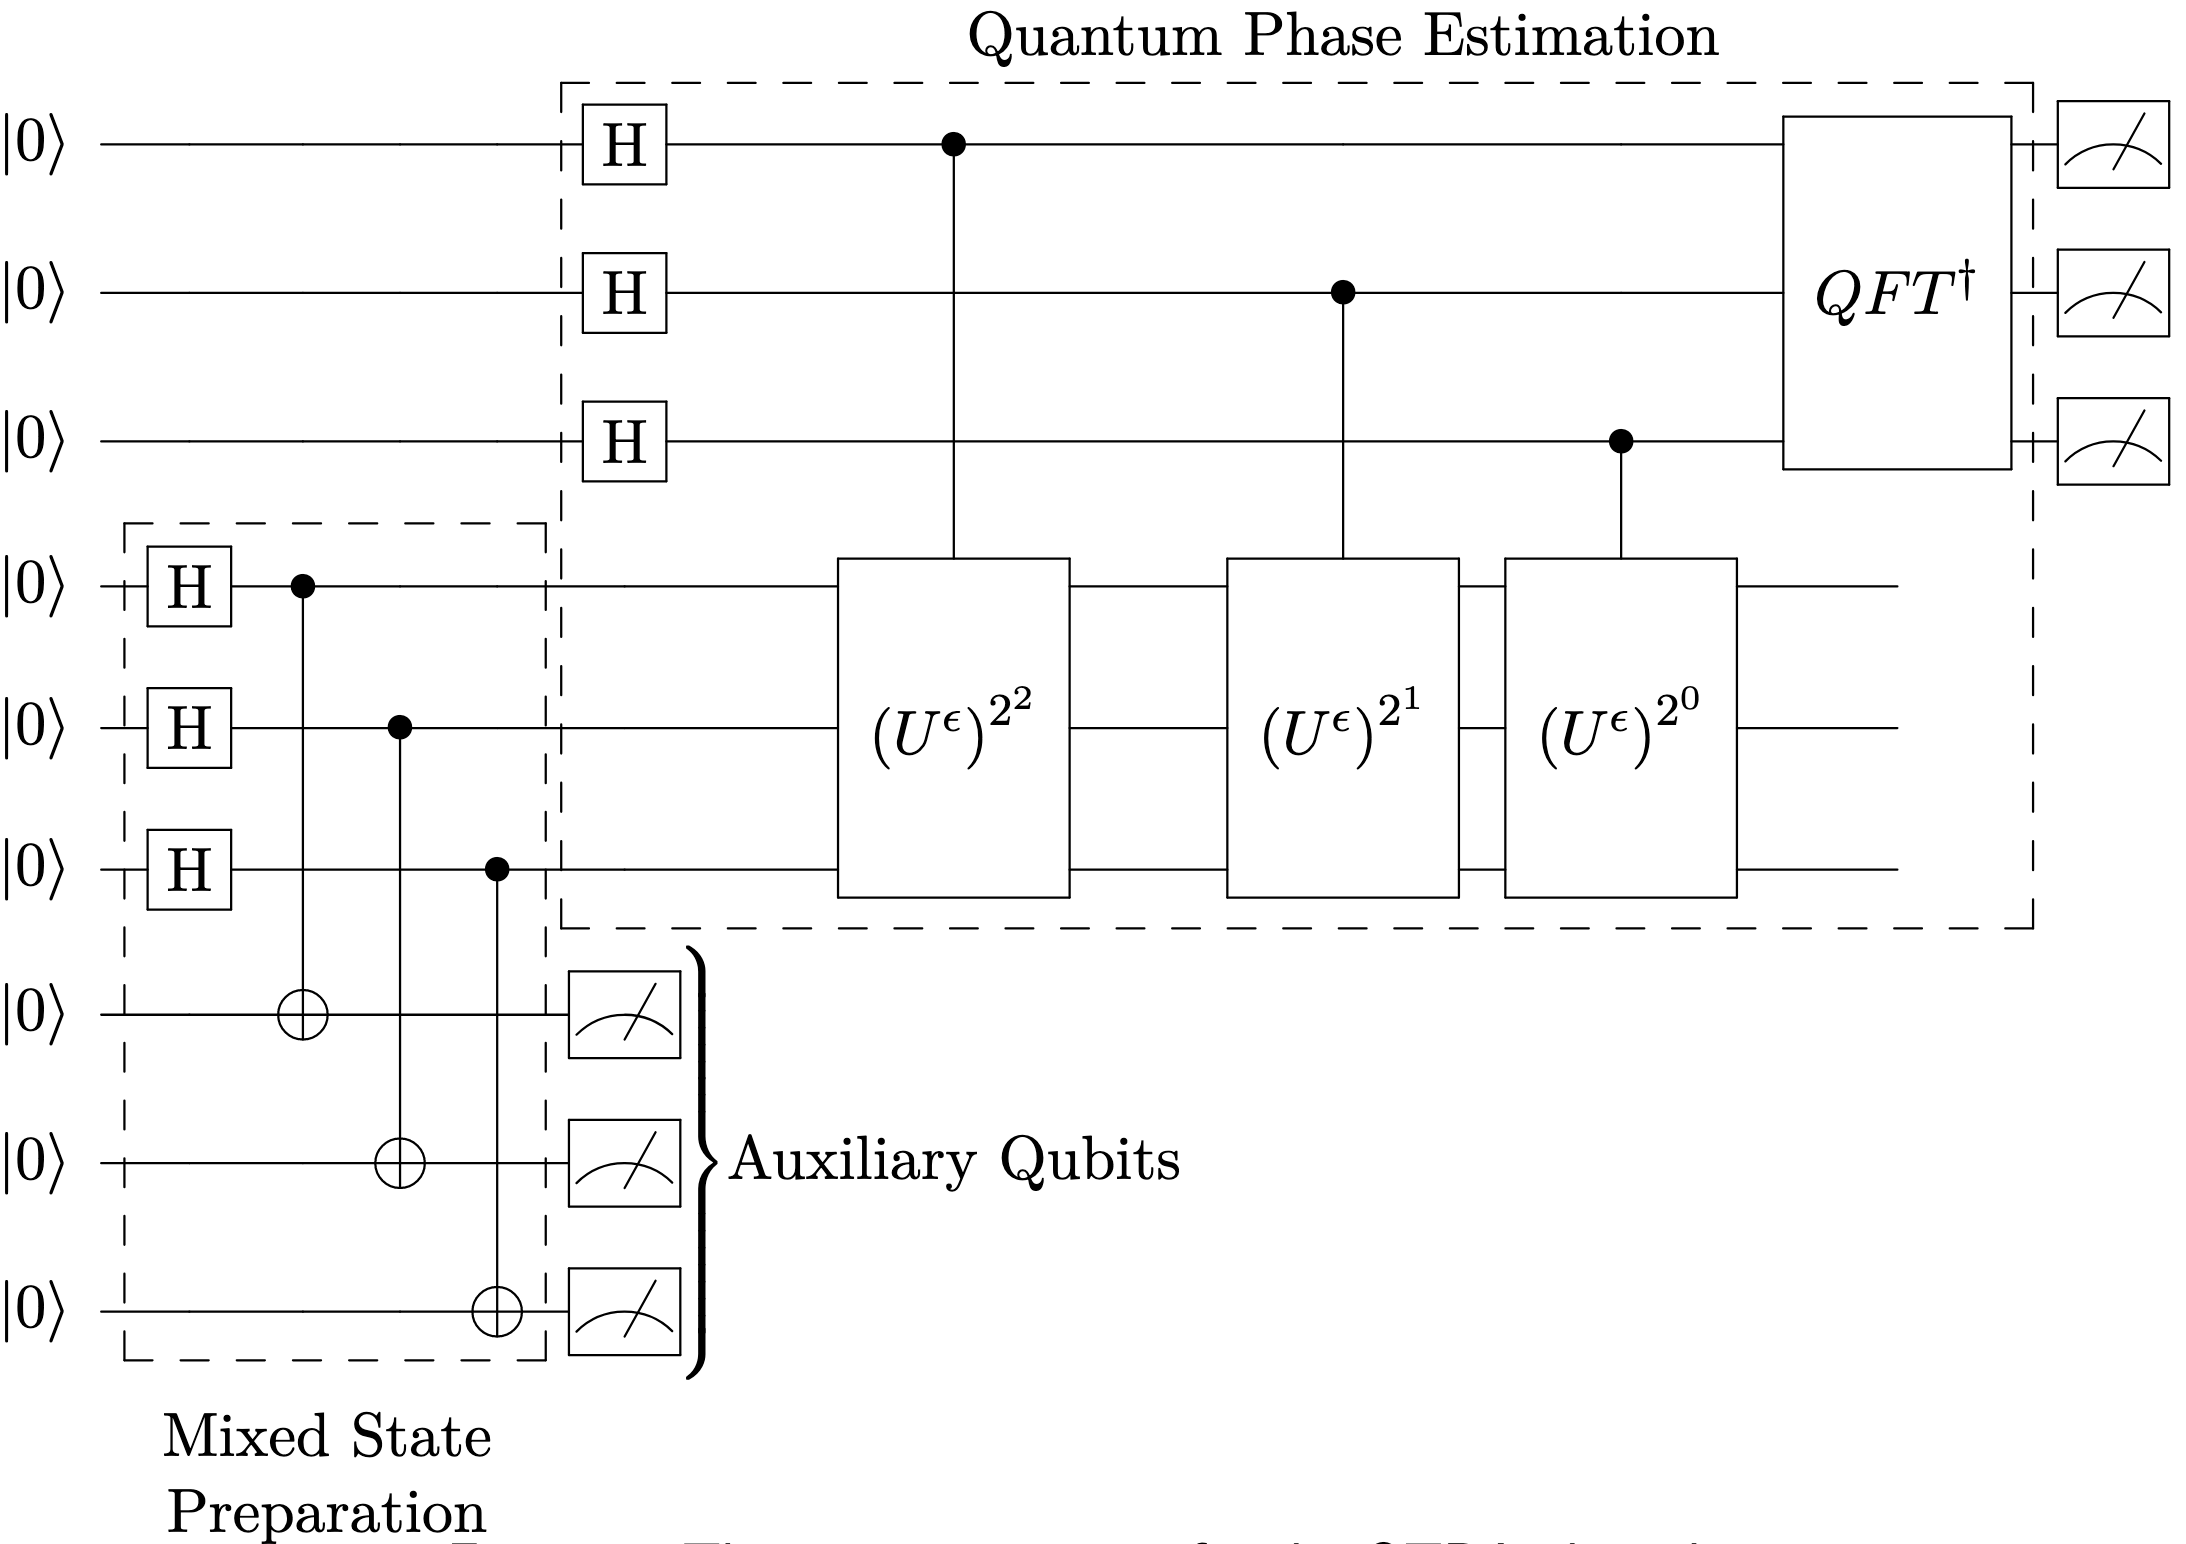


For your reference, the tutorial of QPE in several major quantum computing libraries are listed below:

* [Qiskit](https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb)
* [Pennylane](https://pennylane.ai/qml/demos/tutorial_qpe)
* [CUDA-Q](https://nvidia.github.io/cuda-quantum/latest/specification/cudaq/examples.html#quantum-phase-estimation:~:text=Quantum%20Phase%20Estimation-,%C2%B6,-C%2B%2B)
* [Cirq](https://quantumai.google/cirq/experiments/textbook_algorithms#phase_estimation)

**Example:**

In our example, the probability of measuring all-zero states is approximately $p(0)=0.137 = \tilde{\beta}_k / 2^3 \implies \tilde{\beta}_k = 1.096$, which is then rounded to $1$.

**Action:**

Utilize your preferred quantum computing library to apply QPE for estimating the number of zero eigenvalues in the Laplacian matrix. Note that the exponential of the Laplacian matrix is used as the unitary operator in QPE.

**Answer:**

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

from qiskit_aer import AerSimulator

# we import the inverse qft from Qiskit
from qiskit.circuit.library import QFT

from qiskit.visualization import plot_histogram

##########################################################
# 3) Build QPE Circuit
##########################################################

def build_qpe_circuit(unitary, t_count, q_system):
    """
    Build a QPE circuit for a given unitary on q_system qubits,
    using t_count qubits as the counting register.

    Parameters
    ----------
    unitary : UnitaryGate
        The operator U whose phase we want to estimate.
        Must act on q_system qubits.
    t_count : int
        Number of qubits in the counting register.
    q_system : int
        Number of qubits in the system register.

    Returns
    -------
    qpe_circ : QuantumCircuit
        A circuit with (t_count + q_system) qubits. The first t_count
        qubits are the counting register (measured at the end).
        The last q_system qubits hold the system (target) register.
    """
    # total qubits
    total_qubits = t_count + q_system

    # Make the circuit
    qpe_circ = QuantumCircuit(total_qubits, t_count)

    # 1) Apply Hadamard on the counting qubits
    for i in range(t_count):
        qpe_circ.h(i)

    # 2) Controlled-U^(2^i) for each counting qubit
    #    Note: counting qubits are [0..t_count-1], system qubits are [t_count..end]
    for i in range(t_count):
        # exponent = 2^i
        repeat = 1 << i  # 2^i
        for _ in range(repeat):
            # Controlled version from counting_qubit=i onto all system qubits
            qpe_circ.append(unitary.control(1), [i] + list(range(t_count, total_qubits)))

    # 3) We run the inverse QFT on the counting qubits 
    qpe_circ.append(QFT(t_count, inverse=True), range(t_count))

    # and measure the counting qubits
    for i in range(t_count):
        qpe_circ.measure(i, i)

    return qpe_circ


def qpe_run_betti_estimation(Delta_k, t_count=3, shots=2048, delta=None, show_histogram=False):
    """
    Estimate the number of zero eigenvalues (Betti number) of a Laplacian Delta_k 
    by using QPE. The procedure is:

    1) Pad & rescale Delta_k => H => U = exp(iH).
    2) Build a QPE circuit with 't_count' counting qubits, 
       plus 'q_system' = log2(dim(U)) system qubits.
    3) Initialize the system qubits in a uniform superposition 
       (or any 'pseudo-maximally-mixed' approach).
    4) Measure the fraction of times the counting register = all zeros.
    5) betti_est = 2^(q_system) * p(0).

    Parameters
    ----------
    Delta_k : np.ndarray
        The raw Laplacian matrix (d x d).
    t_count : int
        Number of counting qubits in QPE (precision).
    shots : int
        Number of measurements for the simulation.
    delta : float, optional
        Rescaling factor < 2π for the padded Laplacian. 
        If None, default ~ 2π*0.99 used.
    show_histogram : bool
        If True, display the measurement histogram.

    Returns
    -------
    betti_est_rounded : int
        The estimated Betti number (rounded).
    betti_est_float : float
        The raw estimate before rounding.
    p_zero : float
        The measured probability of all-zero outcome in the counting register.
    """
    H, q_system = build_padded_laplacian(Delta_k, delta=delta)

    # For small matrices, we use direct exponentiation:
    U_mat = expm(1j * H)

    U_gate = UnitaryGate(U_mat, label="U=e^{iH}")

    qpe_circ = build_qpe_circuit(unitary=U_gate, t_count=t_count, q_system=q_system)

    # Optionally, we might want to "randomize" or superpose the system qubits 
    # to emulate a 'maximally mixed' state. A simple approach is to apply H to all system qubits:
    for sys_qb in range(q_system):
        qpe_circ.h(t_count + sys_qb)

    # We run the circuit on a simulator
    aer_sim = AerSimulator()
    transpiled = transpile(qpe_circ, aer_sim)
    job = aer_sim.run(transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # The probability of measuring all zeros in counting register is given by:
    zero_key = "0" * t_count
    p_zero = counts.get(zero_key, 0) / shots

    # The Betti number is ~ 2^q_system * p_zero
    betti_est_float = (2**q_system) * p_zero
    betti_est_rounded = int(round(betti_est_float))

    # Showing histogram
    if show_histogram:
        from qiskit.visualization import plot_histogram
        display(plot_histogram(counts, title="QPE Measurement Results"))

    return betti_est_rounded, betti_est_float, p_zero


<div class="alert alert-block alert-info"> <b>NOTE</b>:

The unitary operator can be constructed by converting the exponential matrix of the Laplacian into a quantum circuit. For instance, in Qiskit, this can be implemented using `circuit.unitary(exp_matrix)`. Alternative methods for constructing the unitary operator will be optionally explored in the **BONUS** section at the end of this notebook.
</div>
<div class="alert alert-block alert-danger">
    
<b>BONUS EXERCISE:</b> 

1. Why we should measure all-zero states?
2. What is the difference between a maximally mixed state and the $(H\ket{0})^{\otimes n}$ state? Two possible aspects are:

* Plotting of their density matrix.
* Results from QPE.

3. What parameters affect the accuracy of the estimation before rounding? For Laplacian matrices of varying sizes, how does the accuracy depend on these parameters? Within what range of values do these parameters guarantee (or are highly likely to produce) a correct final result?
</div>

<div class="alert alert-block alert-success">
    
<b>BONUS EXERCISE RESPONSE:</b> 

1. When we perform the QPE, because the matrix is unitary the eigenphase corresponds to the eigenvalue. After the inverse QFT is applied, the 0 phase appears in the counting qubits as $\ket{0 \cdots 0}$. Therefore, the zero eigenvalues map to the all-zero states, so the latter serves a proxy for the nullity of the map and thus the Betti number.

2. FINISH

* Plotting of their density matrix.
* Results from QPE.

3. FINISH
</div>

### Step 4: Detecting market crashes

**Instruction:**

At this point, we have betti curves for each window across our dataset, and we wish to use this to detect market crashes. One such way is to take the difference between these curves—or the pairwise distance—for successive windows and look for spikes. This can be done with the $L^p$ norm of the betti curve for each window, defined as follows:

$$||x||_p = (\sum_{n}^{i=1} |x_i|^p)^{1/p}$$

Combining these pairwise distances into a vector, we get a single output curve we can analyze. Experiment with different values of $p$, but a good starting point is the $L^2$ Norm. Using this, it is possible to detect regions where a market crash is occuring. Comparing detected crashes with the price data indicates how accurate the crash detection methodology is ([ref](https://github.com/giotto-ai/stock-market-crashes/blob/master/Stock%20Market%20Crash%20Detection.ipynb)). 

**Action:**

Use the $L^p$ norm to create pairwise distance curves for successive windows, and then use the results to define when a crash is occuring. Compare this with your data to see how well it performs. You may find the following classical solver is useful.

**Answer:**

In [7]:
from ripser import ripser

def classical_betti_solver(point_cloud, epsilon, dim, min_persistence):
    '''Return the Betti number on a given point cloud.
    Args:
        point_cloud: the point cloud after applying the sliding window.
        epsilon: resolution threshold.
        dim: the dimension on which the Betti number is calculated
    '''
    result = ripser(point_cloud, maxdim=dim)
    diagrams = result["dgms"]
    filtered_intervals = [
        (birth, death) for birth, death in diagrams[dim] if (death - birth) >= min_persistence
    ]
    
    # Count how many features are alive at epsilon
    betti_number = sum(1 for birth, death in filtered_intervals if birth < epsilon < death)
    return betti_number

def return_betti_curves(time_varying_point_clouds, k, eps_params=[0.1,0.15,6], min_persistence=0.01):
    """
    For each window's point cloud, compute a vector of Betti numbers 
    across different epsilons and dimensions, forming a "Betti curve".
        
    Returns
    -------
    betti_curves : list of np.ndarray
        A list (one entry per window). Each entry is a 1D array 
        containing the Betti numbers for all combinations of (eps in epsilons, dim in dims).
        The ordering is [B(epsilons[0], dims[0]), B(epsilons[0], dims[1]), ..., B(epsilons[1], dims[0]), ... ].
    """
    eps = np.linspace(eps_params[0], eps_params[1], eps_params[2]) 

    betti_curves = []
    for pc in time_varying_point_clouds:
        betti_vals = []
        for epsilon in eps:
            bn = classical_betti_solver(pc, epsilon, dim=k, min_persistence=min_persistence)
            betti_vals.append(bn)
        betti_curves.append(np.array(betti_vals))
    return betti_curves

def lp_distance(x, y, p=2):

    return np.sum(np.abs(x - y) ** p) ** (1.0 / p)

def compute_pairwise_distance_curve(betti_curves, p=2):
    """
    Given a list of Betti curve vectors (one per window), 
    compute the L^p distance between successive windows.

    Returns
    -------
    dist_curve : np.ndarray
        A 1D array of length (len(betti_curves) - 1), 
        where dist_curve[i] = || betti_curves[i+1] - betti_curves[i] ||_p
    """
    n_windows = len(betti_curves)
    if n_windows < 2:
        raise ValueError("Not enough windows to compute pairwise distances.")
    
    dist_curve = []
    for i in range(n_windows - 1):
        dist_val = lp_distance(betti_curves[i+1], betti_curves[i], p=p)
        dist_curve.append(dist_val)
    return np.array(dist_curve)

def detect_crashes(distance_curve, time_index, method="auto", manual_threshold=None, factor=2.0, window_size=5, min_crash_length=2):
    """
    
    Parameters
    ----------
    distance_curve : array-like
        The 1D array of distances between successive windows (e.g. Betti or Landscape distances).
    time_index : array-like
        The corresponding time index for each point in `distance_curve`.
        Should have the same length as `distance_curve`.
    method : {"auto", "manual"}, optional
        The approach to thresholding:
          - "manual": use `manual_threshold` directly.
          - "auto": compute threshold = mean + factor * std, after optional smoothing.
    manual_threshold : float, optional
        If `method="manual"`, this value is taken as the threshold.
    factor : float, optional
        If `method="auto"`, threshold = mean + factor * std. Default = 2.0.
    window_size : int, optional
        Apply a rolling mean over the distance curve with this window_size
        before thresholding, to reduce noise. Set to 1 or None to disable.
    min_crash_length : int, optional
        Minimum number of consecutive points above threshold to consider
        a valid "crash". Default = 2.

    Returns
    -------
    crash_intervals : list of tuples
        Each tuple is (start_time, end_time, max_value_in_interval).
        Represents a contiguous block of indices where the (smoothed) distance
        is above the chosen threshold.
    threshold : float
        The final threshold used.

    """
    distance_curve = np.asarray(distance_curve, dtype=float)
    if len(distance_curve) != len(time_index):
        raise ValueError("distance_curve and time_index must have the same length.")
    
    # Rolling mean smoothing
    if window_size and window_size > 1:

        dist_series = pd.Series(distance_curve, index=time_index)
        dist_smoothed = dist_series.rolling(window_size, center=True, min_periods=1).mean().values
    else:
        dist_smoothed = distance_curve

    # Choosing a threshold
    if method == "manual":
        if manual_threshold is None:
            raise ValueError("Please provide 'manual_threshold' when method='manual'.")
        threshold = manual_threshold
    else:  # method == "auto"
        mu = np.mean(dist_smoothed)
        sigma = np.std(dist_smoothed)
        threshold = mu + factor * sigma

    # Finding intervals above threshold
    above = dist_smoothed > threshold
    crash_intervals = []
    
    i = 0
    n = len(dist_smoothed)
    while i < n:
        if above[i]:
            # Start of a crash interval
            start_idx = i
            max_val = dist_smoothed[i]
            while i < n and above[i]:
                max_val = max(max_val, dist_smoothed[i])
                i += 1
            end_idx = i - 1  # last index still above threshold

            # Only record if interval length >= min_crash_length
            if (end_idx - start_idx + 1) >= min_crash_length:
                crash_intervals.append(
                    (
                        time_index[start_idx],
                        time_index[end_idx],
                        max_val
                    )
                )
        else:
            i += 1

    return crash_intervals, threshold


In [8]:
# sp500 = np.log(pd.read_csv("sp500.csv", header=None).to_numpy().squeeze())

df = pd.read_csv("sp500_full.csv", names=["Date", "Stock Price"])

sp500_full = df["Stock Price"].to_numpy()

# we save the dates as datetime objects, following the format of day-month-year
dates = pd.to_datetime(df["Date"], format="%d/%m/%Y")

df = pd.read_csv("sp500_fat.csv", names=["Index", "Date", "Stock Price"], skiprows=1)

# we get the stock price eliminating the first row, which is the header
sp500_fat = df["Stock Price"].to_numpy()

In [11]:
time_series = sp500_full

prices = time_series
log_returns = np.diff(np.log(prices))

p = 2 # L^p distance
k = 1 #dimension or rank of homology
N = 6 # embedding dimension
d = 10 # time delay
w = 30 # window size # chosen to represent a month of trading days

print ('Computing point clouds')
point_clouds = series_to_point_clouds(log_returns, embedding_dim=N, time_delay=d, window_size=w)

Computing point clouds


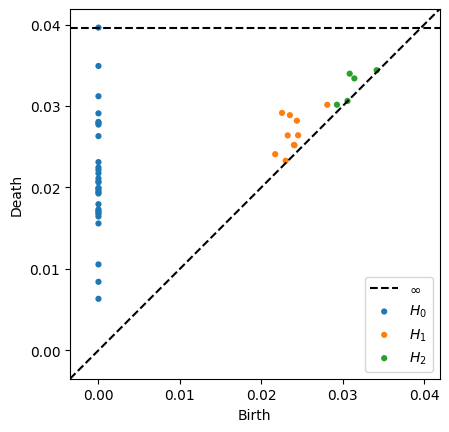

In [12]:
# we use the persistence diagrams here in order to determine the epsilon scale as well as the maximum scale

from ripser import ripser
from persim import plot_diagrams


pc = point_clouds[10]
result = ripser(pc, maxdim=2)
diagrams = result['dgms']
plot_diagrams(diagrams)

In [14]:
# a data driven approach to determine epsilon
from scipy.spatial.distance import pdist

global_max_dist = 0
for pc in point_clouds:
    D = pdist(pc)
    global_max_dist = max(global_max_dist, D.max())
print("Global max distance:", global_max_dist)

Global max distance: 0.19226888653757448


In [ ]:
eps_params = [0,0.1712783786429338,50] # epsilon parameters for Betti curve
p = 2 # L^p distance
k = 0 #dimension or rank of homology
N = 6 # embedding dimension
d = 10 # time delay
w = 40 # window size # chosen to represent a month of trading days

print ('Computing point clouds')
point_clouds = series_to_point_clouds(log_returns, embedding_dim=N, time_delay=d, window_size=w)

Computing point clouds


In [ ]:

pc = point_clouds[0]  # Take one window
distances = pdist(pc)  # Compute all pairwise distances
print("Max distance in point cloud:", distances.max())
print("Min distance in point cloud:", distances.min())

Max distance in point cloud: 0.087057016949976
Min distance in point cloud: 0.006322895520367462


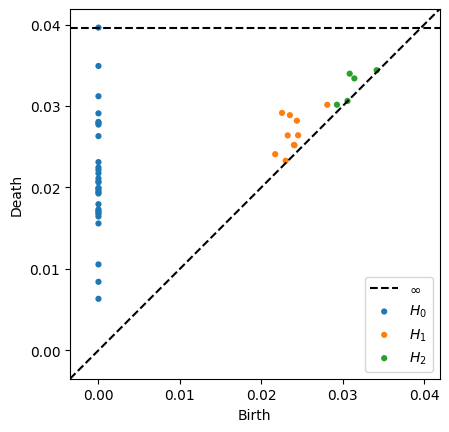

In [21]:
result = ripser(point_clouds[10], maxdim=2)
plot_diagrams(result["dgms"])  # Plot persistence diagram
plt.show()

In [22]:
### We find that a higher embedding dimension is favorable for the Betti curve, 
# as it allows for more complex structures to be captured

In [37]:
import matplotlib.dates as mdates

eps_params = [0,0.19226888653757448,50] # epsilon parameters for Betti curve
p = 2 # L^p distance
k = 1 #dimension or rank of homology
N = 6 # embedding dimension
d = 10 # time delay
w = 30 # window size # chosen to represent a month of trading days

time_series = sp500_full

prices = time_series
log_returns = np.diff(np.log(prices))

print ('Computing point clouds')
point_clouds = series_to_point_clouds(log_returns, embedding_dim=N, time_delay=d, window_size=w)

print ('Computing betti curves')
betti_curves = return_betti_curves(point_clouds, k, eps_params=eps_params, min_persistence=0.0060)

print ('Computing distance curve')
distance_curve = compute_pairwise_distance_curve(betti_curves, p=p)


Computing point clouds
Computing betti curves
Computing distance curve


/var/folders/vk/m7ghln457dz3jnw8s4s2srg40000gn/T/ipykernel_73430/1761958547.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


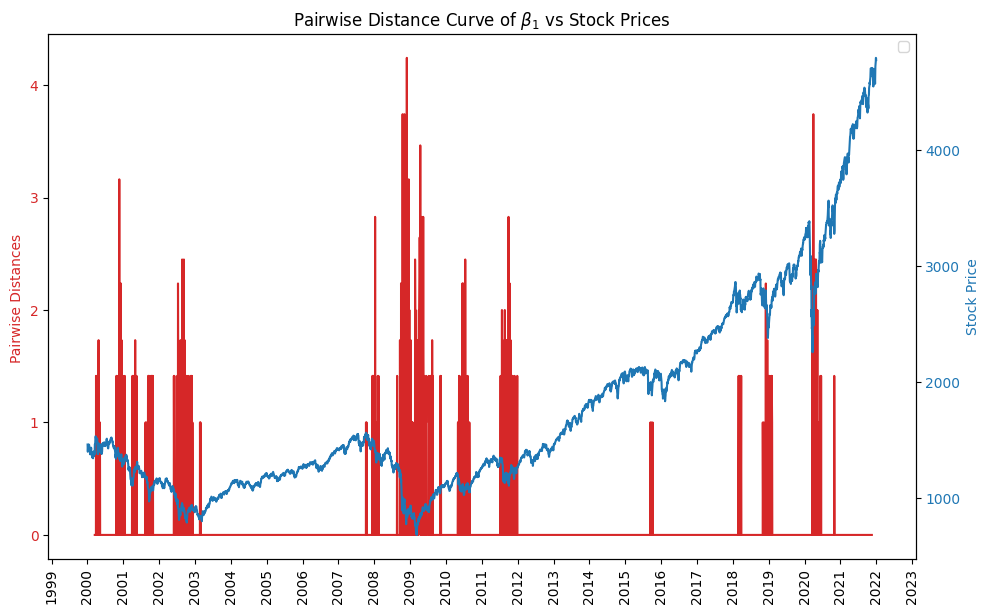

In [38]:
# we plot the distance curve along with the stock prices to see if there are any crashes
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# we make the figure size bigger
fig.set_size_inches(10, 6)

df = pd.read_csv("sp500_full.csv", names=["Date", "Stock Price"])

dates = pd.to_datetime(df["Date"], format="%d/%m/%Y")

embedding_offset = (N - 1) * d  # Offset lost due to Takens embedding
window_centers = embedding_offset + np.arange(len(betti_curves)) # Match lengths
window_centers = window_centers[1:]  # Skip first window due to pairwise distances
window_dates = dates[window_centers]

color = 'tab:red'
ax1.set_ylabel(fr'Pairwise Distances ', color=color)
ax1.plot(window_dates, distance_curve, color=color, label="Betti Curve Difference")
ax1.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
# ax1.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format of the ticks

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_xlabel('Time')
ax2.set_ylabel('Stock Price', color=color)
ax2.plot(dates, time_series, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha="center")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.title(fr"Pairwise Distance Curve of $\beta_1$ vs Stock Prices")
plt.show()

### NOTE: as a result of varying the sensitivity, we have a proxy for finding larger vs small crashes in the market. 
### Lower min persistence means that smaller crashes are noticed


In [64]:
# Testing the quantum application of the Betti number estimation
# We'll use the same time series data as before
embedding_dim = 4
time_delay = 5
window_size = 5
epsilon = 0.1
precision_qubits = 3
betti_num_order = 0

# Perform Takens' embedding
embedded_vectors = takens_embedding(time_series, embedding_dim, time_delay)

# Apply sliding window to obtain time-varying point clouds
point_clouds = sliding_window_point_clouds(embedded_vectors, window_size)

# compute laplacian matrices for each point cloud, at homological dimension of 1
laplacians = [compute_unpadded_laplacian(pc, k=betti_num_order, max_edge_length=epsilon) for pc in point_clouds]

# Compute Betti number using QPE
betti_estimates = []
for Delta_k in laplacians:
    betti_est = qpe_run_betti_estimation(Delta_k, t_count=precision_qubits, shots=2048, delta=None, show_histogram=False)
    betti_estimates.append(betti_est[0])

Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array
Delta_k is a numpy array


In [ ]:
# Testing the quantum application of the Betti number estimation
# We'll use the same time series data as before
embedding_dim = 4
time_delay = 5
window_size = 5
epsilon = 0.1
precision_qubits = 3
betti_num_order = 0

def compute_quantum_betti_nums():
    # Perform Takens' embedding
    embedded_vectors = takens_embedding(time_series, embedding_dim, time_delay)

    # Apply sliding window to obtain time-varying point clouds
    point_clouds = sliding_window_point_clouds(embedded_vectors, window_size)

    # compute laplacian matrices for each point cloud, at homological dimension of 1
    laplacians = [compute_unpadded_laplacian(pc, k=betti_num_order, max_edge_length=epsilon) for pc in point_clouds]

    # Compute Betti number using QPE
    betti_estimates = []
    for Delta_k in laplacians:
        betti_est = qpe_run_betti_estimation(Delta_k, t_count=precision_qubits, shots=2048, delta=None, show_histogram=False)
        betti_estimates.append(betti_est[0])

## *BONUS:* Explore future directions of quantum TDA

The following is a non-exhaustive list of possible next steps for the quantum TDA pipeline. It is recommended to at least explore 1 option or sub-option.

- **Find more of applications of TDA in finance**:

  There are several directions where to extend the analysis. Most work on time series analysis has used persistent homology, and more specifically, the $L^{P}$ norm of persistence landscapes, which can be used to detect early warning signals of imminent market crashes. This is precisely studied in the seminal work by Gidea and Katz, see [ref](https://arxiv.org/abs/1703.04385)
    - Analyze financial correlation network and their degree of association with Betti curves or other topological features. From the time-series of multiple stock prices, we can build time-dependent correlation networks, which exhibit topological structures and might show some association to the evolution of betti curves or other topological data measures. Generally speaking, the cross correlations in a stock market will be in the form of a high-dimension topological space, with more complicated features. One can also think about other time varying financial graphs (e.g. cryptocurrencies). The following articles can help uncover more applications: 
  
      - [Integral Betti signature confirms the hyperbolic geometry of brain, climate,and financial networks](https://www.arxiv.org/pdf/2406.15505)
      - [Using Topological Data Analysis (TDA) and Persistent Homology to Analyze the Stock Markets in Singapore and Taiwan](https://www.frontiersin.org/journals/physics/articles/10.3389/fphy.2021.572216/full)
    - Build a ML classifier or regressor on top of vectorized features such as Betti Curves (given their potential to identify trends, patterns or potential turning points in the market) to help with investment or risk management strategies. Show that Betti curves have some predictive skill, as key topological descriptors. See [ref1](https://arxiv.org/abs/2411.13881) and [ref2](https://www.sciencedirect.com/science/article/pii/S2405918823000235) for further information on the topic.
- **A hybrid and more NISQ-friendly quantum TDA pipeline**:
  
  QPE remains primarily theoretical. Its circuits are simply too deep to run on real hardware. Come up an with iterative or hybrid quantum phase estimation protocol or use tools that increase the algorithmic performance when running quantum circuits on real hardware. Benchmark them against textbook-QPE circuits. Here are some proposals to subtitute the QPE part:
    - Variational Quantum Deflation (VQD) Algorithm: VQD is a quantum algorithm that uses a variational technique to find the k eigenvalues of the Hamiltonian H of a given system. [ref](https://quantum-journal.org/papers/q-2019-07-01-156/)
    - Variational Quantum Eigensolver (VQE): Using VQE to determine the spectra of adjancency or laplacian matrix. Inspired by: [ref](https://arxiv.org/pdf/1912.12366)
  
  Finally, run some circuits on simulator + real hardware and compare the performance (runtime, noise effects, # resources) of the new proposal to the QPE solution of the above sections.

- **A proper procedure of encoding the Laplacian matrix to the unitary**:

  In Step 3, encoding the exponential matrix is recommanded. An alternative approach is to conduct the Paulis decomposition on the Laplacian, then followed by Trotterization. Can you implement this approach in your pipeline? What parameters influence the accuracy? Can you optimize your code to minimize the circuit depth?

- **Extend the quantum TDA to extract persistent Betti numbers**: 
  
  Implement a quantum TDA algorithm for persistent Betti numbers. Esstimating the persistent Betti numbers is a more general task than estimating the Betti number and it is more practical for TDA. It is an open problem to construct a quantum algorithm for the persistent Betti numbers in a way that is preferable for NISQ devices, and the only current implementation of a quantum algorithm for persistent betti number is shown [here](https://quantum-journal.org/papers/q-2022-12-07-873/pdf/).

In [2]:
### For one of our bonus applications, we will employ a deep learning approach (LSTM, a form of RNN) to predict crashes
### using our algorithm for producing Betti curves.

In [5]:
import pandas as pd
import numpy as np
sp500_fat = pd.read_csv("sp500_fat.csv", names=["Date", "Stock Price"], skiprows=1)["Stock Price"].to_numpy()

In [6]:
def create_crash_labels(prices, threshold=-0.05, horizon=20):
    """
    Returns a binary array indicating whether there is a drop of `threshold`
    or more from day t to day t+horizon.
    Args:
        prices: array of daily prices
        threshold: e.g. -0.10 for a 10% drop
        horizon: number of days into the future to check
    Returns:
        crash_labels: 1 if drop <= -10%, 0 otherwise
    """
    # We ensure everything is a float
    prices = prices.astype(float)
    L = len(prices)
    
    crash_labels = np.zeros(L, dtype=int)
    
    for t in range(L - horizon):

        future_return = (prices[t+horizon] - prices[t]) / prices[t]
        if future_return <= threshold:
            crash_labels[t] = 1
        else:
            crash_labels[t] = 0
            
    # The last `horizon` days cannot form a label, so we'll just keep them as 0 or mask them out
    return crash_labels


In [7]:
df = pd.read_csv("sp500_fat.csv", names=["Index", "Date", "Stock Price"], skiprows=1)
distance_curve = np.load('distance_curve_sp500_fat.npy')

eps_params = [0,0.1712783786429338,50] # epsilon parameters for Betti curve
p = 2 # L^p distance
k = 1 #dimension or rank of homology
N = 6 # embedding dimension
d = 10 # time delay
w = 30 # window size # chosen to represent a month of trading days

embedding_offset = (N - 1) * d  # Offset lost due to Takens embedding
window_centers = embedding_offset + np.arange(len(distance_curve))  # No center shift

# Convert dates to datetime format
dates = pd.to_datetime(df["Date"], format="%Y-%m-%d")
window_dates = dates[window_centers]  # Use .iloc to avoid KeyError issues

In [8]:
len(distance_curve)

24305

In [9]:
# We already have:
# dates.shape = (L,)
# stock_prices.shape = (L,)
# tda_features.shape = (L, F)  # F TDA features per day

stock_prices = sp500_fat
stock_drop_threshold = -0.05

labels = create_crash_labels(stock_prices, threshold=stock_drop_threshold, horizon=20)

df_distance = pd.DataFrame({
    'Date': window_dates,           
    'BettiDistance': distance_curve 
})

df_stock = pd.DataFrame({
    'Date': dates,
    'Price': stock_prices
})

# Convert Date columns to datetime if not already
df_distance['Date'] = pd.to_datetime(df_distance['Date'])
df_stock['Date']    = pd.to_datetime(df_stock['Date'])

# 3) Merge them by Date
#    An inner merge will only keep dates present in both sets
df_merged = pd.merge(df_distance, df_stock, on='Date', how='inner')

# 4) Create crash labels
#    - First, sort by Date so indexing is chronological
df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)
prices_array = df_merged['Price'].values
crash_labels = create_crash_labels(prices_array, threshold=-0.10, horizon=20)

df_merged['CrashLabel'] = crash_labels

# 5) Define the ML-friendly dataset
#    - Our single TDA feature is "BettiDistance"
X_all = df_merged[['BettiDistance']].values
y_all = df_merged['CrashLabel'].values
all_dates = df_merged['Date'].values  # if needed for splitting

print("Feature shape:", X_all.shape)
print("Label shape:  ", y_all.shape)


# Now we have a single DataFrame with columns:
# ["Date", "Price", "CrashLabel", "TDAFeature_0", ..., "TDAFeature_{F-1}"]


Feature shape: (24305, 1)
Label shape:   (24305,)


In [10]:
df_distance['Date']

50      1928-03-15
51      1928-03-16
52      1928-03-19
53      1928-03-20
54      1928-03-21
           ...    
24350   2024-12-09
24351   2024-12-10
24352   2024-12-11
24353   2024-12-12
24354   2024-12-13
Name: Date, Length: 24305, dtype: datetime64[ns]

In [11]:
df_stock['Date']

0       1928-01-03
1       1928-01-04
2       1928-01-05
3       1928-01-06
4       1928-01-09
           ...    
24381   2025-01-27
24382   2025-01-28
24383   2025-01-29
24384   2025-01-30
24385   2025-01-31
Name: Date, Length: 24386, dtype: datetime64[ns]

In [12]:
train_mask = ((pd.Timestamp("1986-01-01") <= df_merged['Date']) & (df_merged['Date'] < pd.Timestamp("2014-01-01")))
test_mask  = ((pd.Timestamp("2025-01-01") > df_merged['Date']) & (df_merged['Date'] >= pd.Timestamp("2014-01-01")))

df_train = df_merged.loc[train_mask].copy()
df_test  = df_merged.loc[test_mask].copy()

print("Training Range:", df_train['Date'].min(), "to", df_train['Date'].max())
print("Testing Range: ", df_test['Date'].min(), "to", df_test['Date'].max())

# Fix: Convert Pandas DataFrame selection to NumPy arrays
X_train = df_train[['BettiDistance']].values
y_train = df_train['CrashLabel'].values

X_test  = df_test[['BettiDistance']].values
y_test  = df_test['CrashLabel'].values

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Training Range: 1986-01-02 00:00:00 to 2013-12-31 00:00:00
Testing Range:  2014-01-02 00:00:00 to 2024-12-13 00:00:00
Train size: (7060, 1) Test size: (2757, 1)


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Normalize the Betti distances
scaler = StandardScaler()
df_merged['BettiDistance'] = scaler.fit_transform(df_merged[['BettiDistance']])

# Function to create sequences for LSTM
def create_sequences(data, labels, window_size):
    sequences = []
    labels_out = []
    for i in range(len(data) - window_size):
        sequence = data[i:i + window_size]
        label = labels[i + window_size]  # Label for the end of the sequence
        sequences.append(sequence)
        labels_out.append(label)
    return np.array(sequences), np.array(labels_out)

window_size = 30  # How many past days the LSTM looks at
X, y = create_sequences(df_merged['BettiDistance'].values, df_merged['CrashLabel'].values, window_size)

# Split into training and testing (time-based, no shuffle)
split_index = int(0.8 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # (batch, sequence, feature)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)

X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: torch.Size([19420, 30, 1])
Testing data shape: torch.Size([4855, 30, 1])


In [14]:
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))

Device: cpu


In [43]:


# Fix the model (remove sigmoid)
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # No sigmoid

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_time_step = lstm_out[:, -1, :]
        return self.fc(last_time_step)  # Raw logits output

# Instantiate model
model = LSTMModel()
pos_weight = torch.tensor([5.0])  # Increase weight for class 1 (crashes)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)  # Use BCEWithLogitsLoss instead of BCELoss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [44]:
# Training loop

from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

num_epochs = 19
batch_size = 32

for epoch in tqdm(range(num_epochs)):
    model.train()
    
    for batch_X, batch_y in train_loader:  # Process in batches
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move to GPU
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


 26%|██▋       | 5/19 [01:22<04:09, 17.85s/it]

Epoch 5/19, Loss: 0.6546


 53%|█████▎    | 10/19 [02:59<02:52, 19.20s/it]

Epoch 10/19, Loss: 0.1612


 79%|███████▉  | 15/19 [04:37<01:19, 19.76s/it]

Epoch 15/19, Loss: 0.7576


100%|██████████| 19/19 [05:58<00:00, 18.87s/it]


In [46]:
import torch

y_pred_probs = torch.sigmoid(model(X_test).detach().cpu())  # Apply sigmoid manually
y_pred = (y_pred_probs > 0.3).int() 

print(f"y_test shape: {y_test.shape}, y_pred shape: {y_pred.shape}")

def precision_recall_f1(y_true, y_pred):
    # True Positives (TP): y_true is 1 and y_pred is 1
    TP = ((y_true == 1) & (y_pred == 1)).sum().item()

    # True Negatives (TN): y_true is 0 and y_pred is 0
    TN = ((y_true == 0) & (y_pred == 0)).sum().item()

    # False Positives (FP): y_true is 0 but y_pred is 1
    FP = ((y_true == 0) & (y_pred == 1)).sum().item()

    # False Negatives (FN): y_true is 1 but y_pred is 0
    FN = ((y_true == 1) & (y_pred == 0)).sum().item()

    # Precision: TP / (TP + FP)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Assuming y_test and y_pred are your true and predicted labels
precision, recall, f1 = precision_recall_f1(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


y_test shape: torch.Size([4855, 1]), y_pred shape: torch.Size([4855, 1])
Precision: 0.0740
Recall: 0.5204
F1 Score: 0.1296


In [ ]:
y_pred_probs = model(X_test).detach().cpu().squeeze()
print("Raw model outputs (first 10):", y_pred_probs[:100])


In [15]:
model.eval()
y_pred_probs = model(X_test).detach().numpy()  # Move tensor to CPU
y_pred = (y_pred_probs > 0.5).astype(int)

print("Predictions:", y_pred[:10])


# Confusion Matrix and Classification Report
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=3))

# ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC AUC = {roc_auc:.4f}")


RuntimeError: Numpy is not available

# This is the end of the challenge. Good luck!